In [39]:
import keras
import tensorflow
import h5py
import numpy as np
import chowdhury_s_model_builder
import os

import tensorflow as tf
from keras.api.models import Sequential, Model, load_model
from keras.api.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization, LSTM, Input, GlobalAveragePooling2D
from keras.api.optimizers import Adam
from keras import regularizers
from keras.api.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis

from keras.api import mixed_precision
mixed_precision.set_global_policy('mixed_float16')


In [40]:
model = load_model('Emotify_Multi-Label.keras')

In [41]:
W, b = model.get_layer('emotion_dense').get_weights()
# W.shape == (7,9), b.shape == (9,)
print(W.shape, b.shape)

(7, 9) (9,)


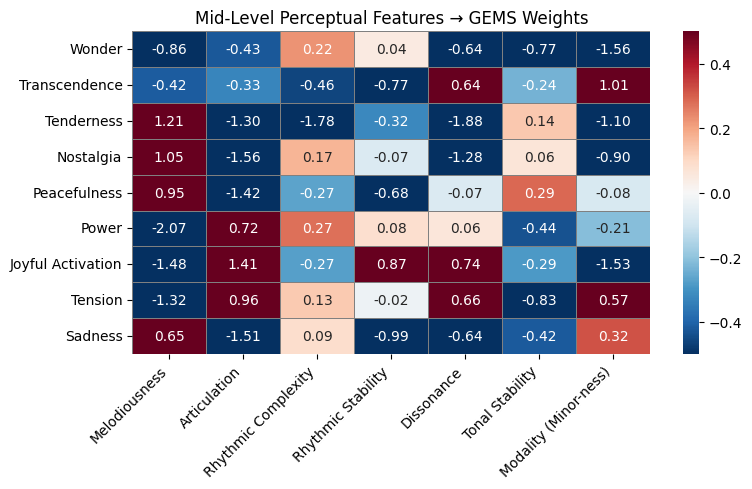

In [42]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

features = ["Melodiousness","Articulation","Rhythmic Complexity","Rhythmic Stability",
            "Dissonance","Tonal Stability","Modality (Minor-ness)"]
# emotions = ["Amazement","Solemnity","Tenderness","Nostalgia","Calmness",
#             "Power","Joy","Tension","Sadness"]
emotions = ["Wonder","Transcendence","Tenderness","Nostalgia","Peacefulness",
            "Power","Joyful Activation","Tension","Sadness"]

df = pd.DataFrame(W, index=features, columns=emotions)

plt.figure(figsize=(8,5))
sns.heatmap(
    df.T,
    annot=True,
    fmt=".2f",
    center=0,
    cmap="RdBu_r",      # a red–white–blue diverging map
    vmin=-0.5,          # force the lowest weight to map to the darkest blue
    vmax=+0.5,          # force the highest weight to map to the darkest red
    linewidths=0.5,
    linecolor="gray"
)
plt.title("Mid‑Level Perceptual Features → GEMS Weights")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()